# DataFrame Methods


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
ipl = pd.read_csv("data/ipl-matches.csv")
movies = pd.read_csv("data/movies.csv")
runs = pd.read_csv("data/batsman_runs_ipl.csv")
marks = pd.Series({"MAT": 97, "CHEM": 97, "PHY": 95, "CSC": 100})
students = pd.DataFrame(
    {
        "name": ["A", "B", np.nan, "D", np.nan, "E"],
        "college": ["ssn", "vit", "bits", "iitm", np.nan, "nitt"],
        "course": ["cse", "eee", np.nan, "bio", np.nan, np.nan],
        "cgpa": [9, 8.5, 7.9, 8.9, np.nan, 9.2],
    }
)

## Value Counts


In [3]:
ipl[~ipl["MatchNumber"].str.isdigit()]["Player_of_Match"].value_counts()

Player_of_Match
F du Plessis         3
SK Raina             3
KA Pollard           3
JJ Bumrah            2
AB de Villiers       2
MK Pandey            2
M Vijay              2
A Kumble             2
YK Pathan            2
SR Watson            2
HH Pandya            1
RM Patidar           1
JC Buttler           1
RR Pant              1
KS Williamson        1
MP Stoinis           1
TA Boult             1
SP Narine            1
RD Gaikwad           1
VR Iyer              1
DA Miller            1
Washington Sundar    1
NM Coulter-Nile      1
KV Sharma            1
BCJ Cutting          1
KH Pandya            1
SA Yadav             1
Rashid Khan          1
AD Russell           1
RG Sharma            1
A Nehra              1
DA Warner            1
MC Henriques         1
Harbhajan Singh      1
BJ Hodge             1
UT Yadav             1
V Sehwag             1
MS Bisla             1
MEK Hussey           1
CH Gayle             1
MS Dhoni             1
MM Patel             1
DE Bollinger      

<Axes: ylabel='count'>

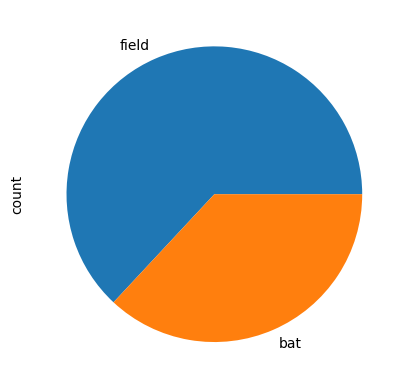

In [4]:
ipl["TossDecision"].value_counts().plot(kind="pie")

In [ ]:
(ipl["Team1"].value_counts() + ipl["Team2"].value_counts()).sort_values(
    ascending=False
)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

## Sort Values


In [ ]:
movies.sort_values(
    ["year_of_release", "title_x"], ascending=[False, True]
).head(3)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
21,22 Yards,tt9496212,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/22_Yards,22 Yards,22 Yards,0,2019,126,Sport,5.3,124,A dramatic portrayal of a victorious tale of a...,A dramatic portrayal of a victorious tale of a...,NaN,Barun Sobti|Rajit Kapur|Panchhi Bora|Kartikey ...,NaN,15 March 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)


## Rank


In [ ]:
runs["rank"] = runs["batsman_run"].rank(ascending=False)
runs.sort_values("rank")

,batter,batsman_run,rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
570,V Pratap Singh,0,594.0
63,Abdur Razzak,0,594.0
562,U Kaul,0,594.0
65,Akash Deep,0,594.0


## Sort Index


In [8]:
marks.sort_index(ascending=False)

PHY      95
MAT      97
CSC     100
CHEM     97
dtype: int64

## Set Index


In [9]:
runs.set_index("batter")

,batsman_run,rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


## Reset Index

- Does not remove original index


In [10]:
runs.reset_index().head(3)

,index,batter,batsman_run,rank
0,0,A Ashish Reddy,280,166.5
1,1,A Badoni,161,226.0
2,2,A Chandila,4,535.0


In [ ]:
# makes Series into DataFrame and set index to "index"
marks.reset_index().set_index("index")

,0
index,
MAT,97
CHEM,97
PHY,95
CSC,100


## Rename


In [ ]:
movies = movies.set_index("title_x")

# Changing Column names
movies = movies.rename(columns={"imdb_id": "imdb", "poster_path": "link"})

# Changing Index names
movies = movies.rename(
    index={
        "The Accidental Prime Minister (film)": "The Accidental Prime Minister"
    }
)
movies.head(3)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister,tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)


## Number of Unique Values


In [13]:
movies["wins_nominations"].nunique()  # does not count Nan

229

In [14]:
movies["wins_nominations"].unique().size  # count Nan

230

## Missing Values


### Is Nan / Is Null


In [15]:
students["course"].isna()

0    False
1    False
2     True
3    False
4     True
5     True
Name: course, dtype: bool

In [16]:
students.isna()

,name,college,course,cgpa
0,False,False,False,False
1,False,False,False,False
2,True,False,True,False
3,False,False,False,False
4,True,True,True,True
5,False,False,True,False


### Is Not NaN


In [17]:
students["name"][students["college"].notna()]

0      A
1      B
2    NaN
3      D
5      E
Name: name, dtype: object

In [18]:
students.notna()

,name,college,course,cgpa
0,True,True,True,True
1,True,True,True,True
2,False,True,False,True
3,True,True,True,True
4,False,False,False,False
5,True,True,False,True


### Drop NaN


In [19]:
students

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
2,NaN,bits,NaN,7.9
3,D,iitm,bio,8.9
4,NaN,NaN,NaN,NaN
5,E,nitt,NaN,9.2


In [ ]:
# drops entire row if any Column is NaN
students.dropna()

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
3,D,iitm,bio,8.9


In [ ]:
# drops entire row only if all Columns are NaN

students.dropna(how="all")

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
2,NaN,bits,NaN,7.9
3,D,iitm,bio,8.9
5,E,nitt,NaN,9.2


In [ ]:
# Drop row based on a column
students.dropna(subset=["name"])

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
3,D,iitm,bio,8.9
5,E,nitt,NaN,9.2


In [ ]:
# Drop row based NaN in name or course
students.dropna(subset=["name", "course"])  # how = "any"

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
3,D,iitm,bio,8.9


In [ ]:
# Drop row based NaN in name and course
students.dropna(subset=["name", "course"], how="all")

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
3,D,iitm,bio,8.9
5,E,nitt,NaN,9.2


### Fill NaN


In [25]:
students["name"].fillna("Unknown")

0          A
1          B
2    Unknown
3          D
4    Unknown
5          E
Name: name, dtype: object

In [26]:
students.ffill()  # forward value based fill

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
2,B,bits,eee,7.9
3,D,iitm,bio,8.9
4,D,iitm,bio,8.9
5,E,nitt,bio,9.2


In [27]:
students.bfill()  # backward value based fill

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
2,D,bits,bio,7.9
3,D,iitm,bio,8.9
4,E,nitt,NaN,9.2
5,E,nitt,NaN,9.2


In [28]:
marks.duplicated()

MAT     False
CHEM     True
PHY     False
CSC     False
dtype: bool

In [29]:
marks.drop_duplicates()

MAT     97
PHY     95
CSC    100
dtype: int64

## Drop


### Drop Duplicates


In [30]:
students

,name,college,course,cgpa
0,A,ssn,cse,9.0
1,B,vit,eee,8.5
2,NaN,bits,NaN,7.9
3,D,iitm,bio,8.9
4,NaN,NaN,NaN,NaN
5,E,nitt,NaN,9.2


### Drop Rows


In [31]:
students.drop(index=[1, 4])

,name,college,course,cgpa
0,A,ssn,cse,9.0
2,NaN,bits,NaN,7.9
3,D,iitm,bio,8.9
5,E,nitt,NaN,9.2


In [ ]:
students = students.set_index("name")
students.drop(index="E")

,college,course,cgpa
name,,,
A,ssn,cse,9.0
B,vit,eee,8.5
NaN,bits,NaN,7.9
D,iitm,bio,8.9
NaN,NaN,NaN,NaN


### Drop Columns


In [33]:
students.drop(columns="cgpa")

,college,course
name,,
A,ssn,cse
B,vit,eee
NaN,bits,NaN
D,iitm,bio
NaN,NaN,NaN
E,nitt,NaN


## Apply


In [ ]:
nums = pd.Series([0.1, 0.20, 0.44, 0.634, 0.62, 0.905, 56])
nums

0     0.100
1     0.200
2     0.440
3     0.634
4     0.620
5     0.905
6    56.000
dtype: float64

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [36]:
nums.apply(sigmoid)

0    0.524979
1    0.549834
2    0.608259
3    0.653396
4    0.650219
5    0.711976
6    1.000000
dtype: float64

In [ ]:
points = pd.DataFrame(
    {
        "First Point": [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)],
        "Second Point": [(10, 9), (8, 7), (6, 5), (4, 3), (2, 1)],
    }
)
points

,First Point,Second Point
0,"(1, 2)","(10, 9)"
1,"(3, 4)","(8, 7)"
2,"(5, 6)","(6, 5)"
3,"(7, 8)","(4, 3)"
4,"(9, 10)","(2, 1)"


In [ ]:
def distance(row):
    pt_A = row["First Point"]
    pt_B = row["Second Point"]
    return ((pt_A[0] - pt_B[0]) ** 2 + (pt_A[1] - pt_B[1]) ** 2) ** 0.5

In [39]:
points.apply(distance, axis=1)

0    11.401754
1     5.830952
2     1.414214
3     5.830952
4    11.401754
dtype: float64